# FMA: A Dataset For Music Analysis
Originally Written by Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, Xavier Bresson, EPFL LTS2.
Modified and Expanded by Alice Murphy

In [2]:
%matplotlib inline
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import utils

Load in Data

In [3]:
tracks = utils.load('tracks.csv')
genres = utils.load('genres.csv')
features = utils.load('features.csv')
echonest = utils.load('echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

/Users/alice/fma/utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


((106574, 52), (163, 4), (106574, 518), (13129, 249))

Show number of tracks with each genre (Genres with at least 2000 tracks)

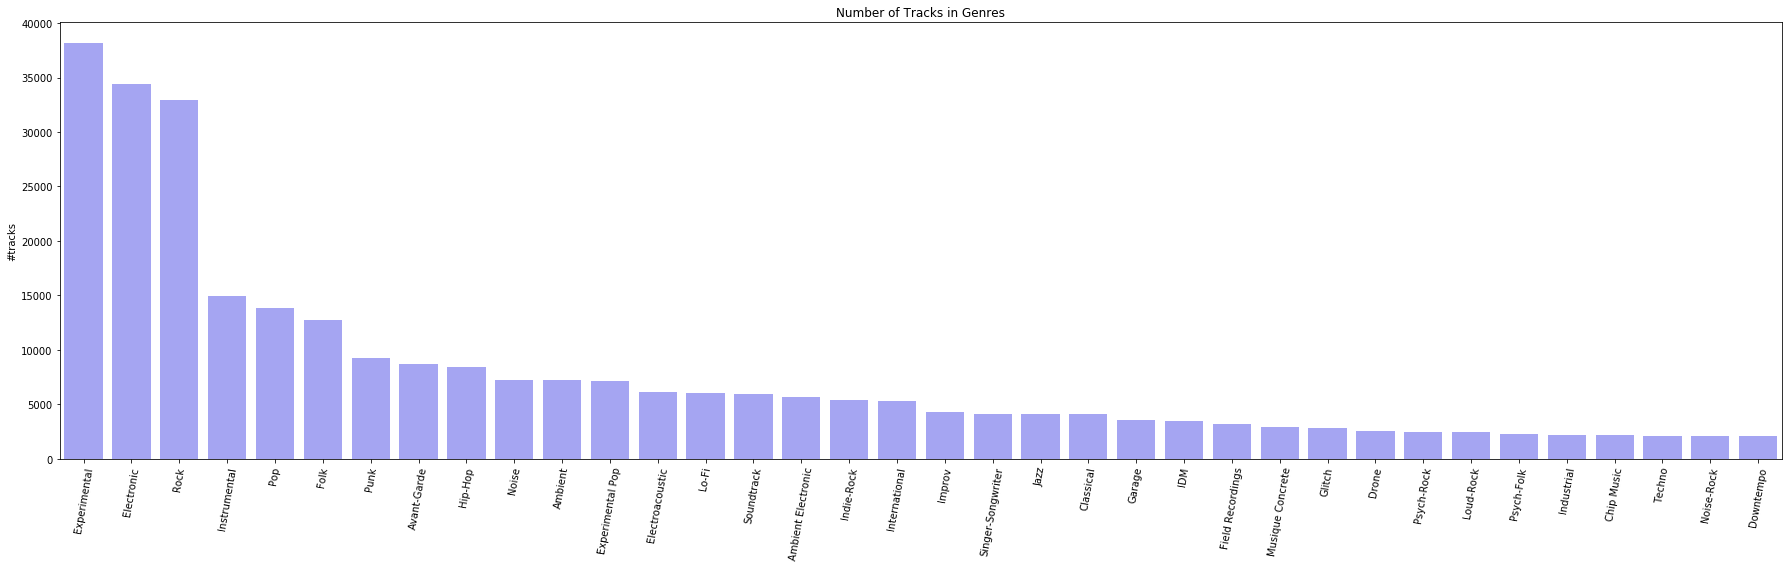

In [4]:
# Number of tracks per genre (full).
d = genres[genres['#tracks'] > 2000].sort_values('#tracks', ascending=False)
plt.figure(figsize=(25, 8))
p = sns.barplot('title', '#tracks', data=d, color='b', alpha=0.4)
p.set_xlabel('')
p.set_ylabel('#tracks')
plt.title('Number of Tracks in Genres')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('genre_distribution.pdf')
genres.loc[genres['#tracks'] > 0, '#tracks'].min(), genres['#tracks'].max()
plt.savefig('trackgenres.png')

Show number of tracks with each top genre 

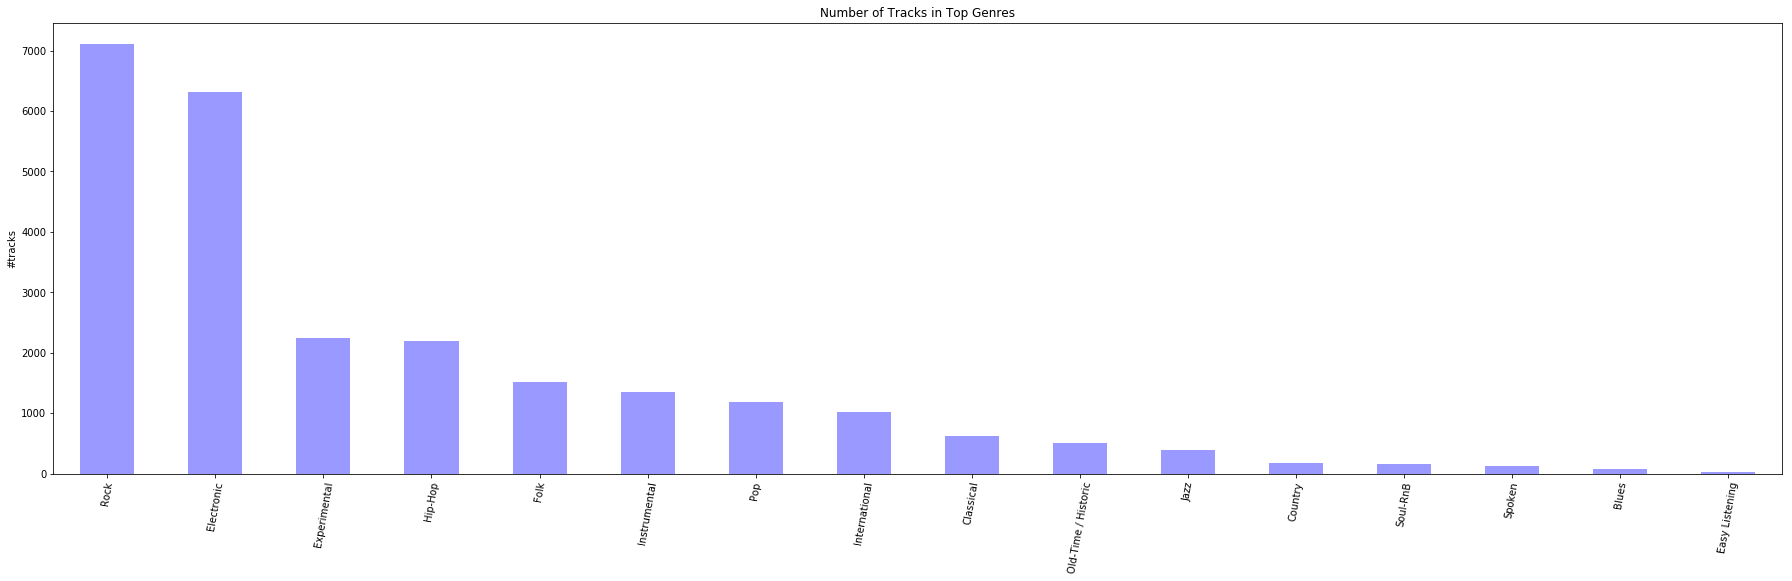

In [5]:
# Number of tracks per top-level genre (medium).
d = tracks[tracks['set', 'subset'] <= 'medium']
d = d['track', 'genre_top'].value_counts()
plt.figure(figsize=(25, 8))
d.plot.bar(color='b', alpha=0.4)
plt.ylabel('#tracks')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('genre_top_distribution.pdf')
plt.title('Number of Tracks in Top Genres')
plt.savefig('topgenres.png')

Show Cross Appearance

In [7]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(tracks['track', 'genres'])
genres_names = enc.classes_
genres_names = genres.loc[enc.classes_, 'title'].values
cross_correlation = genres_indicator.T @ genres_indicator

In [8]:
genres_names

array(['Avant-Garde', 'International', 'Blues', 'Jazz', 'Classical',
       'Novelty', 'Comedy', 'Old-Time / Historic', 'Country', 'Pop',
       'Disco', 'Rock', 'Easy Listening', 'Soul-RnB', 'Electronic',
       'Sound Effects', 'Folk', 'Soundtrack', 'Funk', 'Spoken', 'Hip-Hop',
       'Audio Collage', 'Punk', 'Post-Rock', 'Lo-Fi', 'Field Recordings',
       'Metal', 'Noise', 'Psych-Folk', 'Krautrock', 'Jazz: Vocal',
       'Experimental', 'Electroacoustic', 'Ambient Electronic',
       'Radio Art', 'Loud-Rock', 'Latin America', 'Drone', 'Free-Folk',
       'Noise-Rock', 'Psych-Rock', 'Bluegrass', 'Electro-Punk', 'Radio',
       'Indie-Rock', 'Industrial', 'No Wave', 'Free-Jazz',
       'Experimental Pop', 'French', 'Reggae - Dub', 'Afrobeat',
       'Nerdcore', 'Garage', 'Indian', 'New Wave', 'Post-Punk', 'Sludge',
       'African', 'Freak-Folk', 'Jazz: Out', 'Progressive',
       'Alternative Hip-Hop', 'Death-Metal', 'Middle East',
       'Singer-Songwriter', 'Ambient', 'Hardcore', 

In [9]:
np.fill_diagonal(cross_correlation, 0) #remove correlation of each genre with itself 

In [11]:
high_correlation=[]
p=np.percentile(cross_correlation,99)
for index, val in np.ndenumerate(cross_correlation):
        if val >= p and index[0] < index[1]:
            high_correlation.append([genres_names[index[0]], genres_names[index[1]], val])

In [12]:
sorted_list = sorted(high_correlation, key=lambda x:x[2], reverse=True)
print(sorted_list[:20])

[['Electronic', 'Experimental', 6771], ['Avant-Garde', 'Experimental', 6088], ['Experimental', 'Electroacoustic', 4782], ['Noise', 'Experimental', 4121], ['Soundtrack', 'Instrumental', 2783], ['Experimental', 'Ambient', 2663], ['Avant-Garde', 'Electroacoustic', 2555], ['Experimental', 'Musique Concrete', 2507], ['Experimental', 'Improv', 2385], ['Experimental', 'Ambient Electronic', 2250], ['Electronic', 'IDM', 2230], ['Electroacoustic', 'Musique Concrete', 2183], ['Field Recordings', 'Experimental', 2122], ['Electronic', 'Ambient', 2099], ['Electronic', 'Noise', 2097], ['Avant-Garde', 'Musique Concrete', 2049], ['Electronic', 'Instrumental', 1888], ['Electronic', 'Electroacoustic', 1838], ['Electronic', 'Ambient Electronic', 1834], ['Field Recordings', 'Electroacoustic', 1805]]


In [13]:
a=pd.DataFrame(sorted_list[:20],columns=["Genre 1","Genre 2","Correlation Coefficient"]) #top twenty
#a=pd.DataFrame(sorted_list[:],columns=["Genre 1","Genre 2","Correlation Coefficient"]) #all


In [14]:
norm_a=a.copy()
max_corr=a["Correlation Coefficient"].max()
norm_a["Correlation Coefficient"]=a["Correlation Coefficient"]/ (max_corr) #normalize correlation

In [16]:
norm_a["Genres"]=norm_a["Genre 1"]+"-"+norm_a["Genre 2"]
norm_a

,Genre 1,Genre 2,Correlation Coefficient,Genres
0,Electronic,Experimental,1.000000,Electronic-Experimental
1,Avant-Garde,Experimental,0.899129,Avant-Garde-Experimental
2,Experimental,Electroacoustic,0.706247,Experimental-Electroacoustic
3,Noise,Experimental,0.608625,Noise-Experimental
4,Soundtrack,Instrumental,0.411018,Soundtrack-Instrumental
5,Experimental,Ambient,0.393295,Experimental-Ambient
6,Avant-Garde,Electroacoustic,0.377345,Avant-Garde-Electroacoustic
7,Experimental,Musique Concrete,0.370256,Experimental-Musique Concrete
8,Experimental,Improv,0.352237,Experimental-Improv
9,Experimental,Ambient Electronic,0.332300,Experimental-Ambient Electronic


Show top 20 correlations

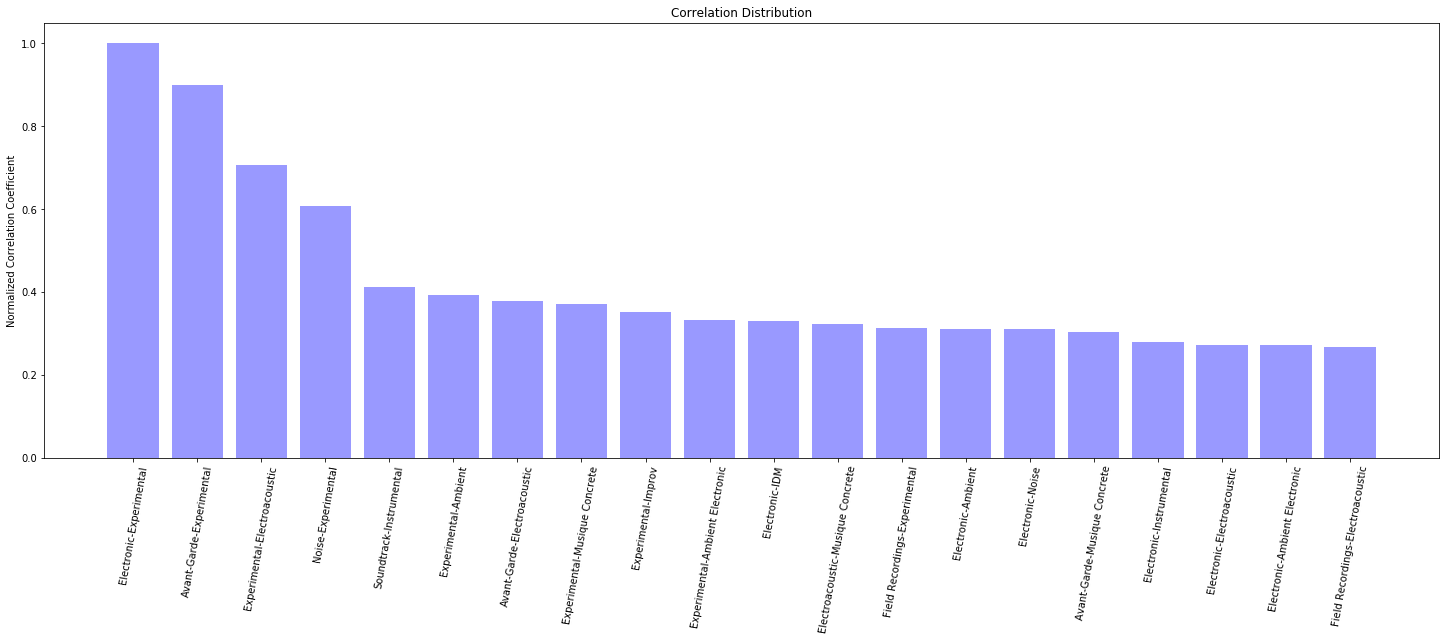

In [18]:
plt.figure(figsize=(25,8))
plt.bar(norm_a["Genres"],norm_a["Correlation Coefficient"],color='b', alpha=0.4)
plt.title('Correlation Distribution')
plt.ylabel('Normalized Correlation Coefficient')
plt.xticks(rotation=80)
plt.savefig('correlationdistribution.png',bbox_inches="tight")

Text(0.5,1,'Correlation Distribution Log Space')

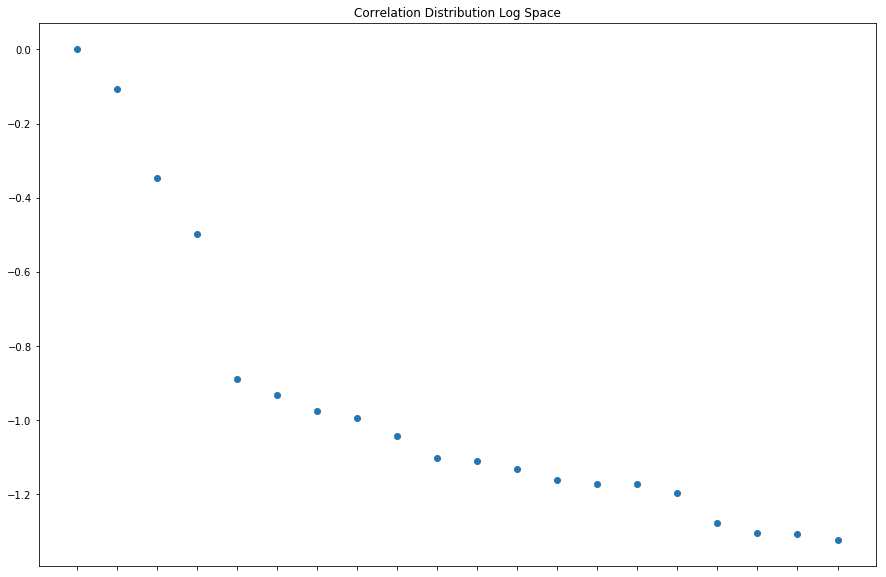

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(norm_a["Genres"],np.log(norm_a["Correlation Coefficient"]))
plt.tick_params(labelbottom=False)
plt.title('Correlation Distribution Log Space')

Show cross correlation through heat map

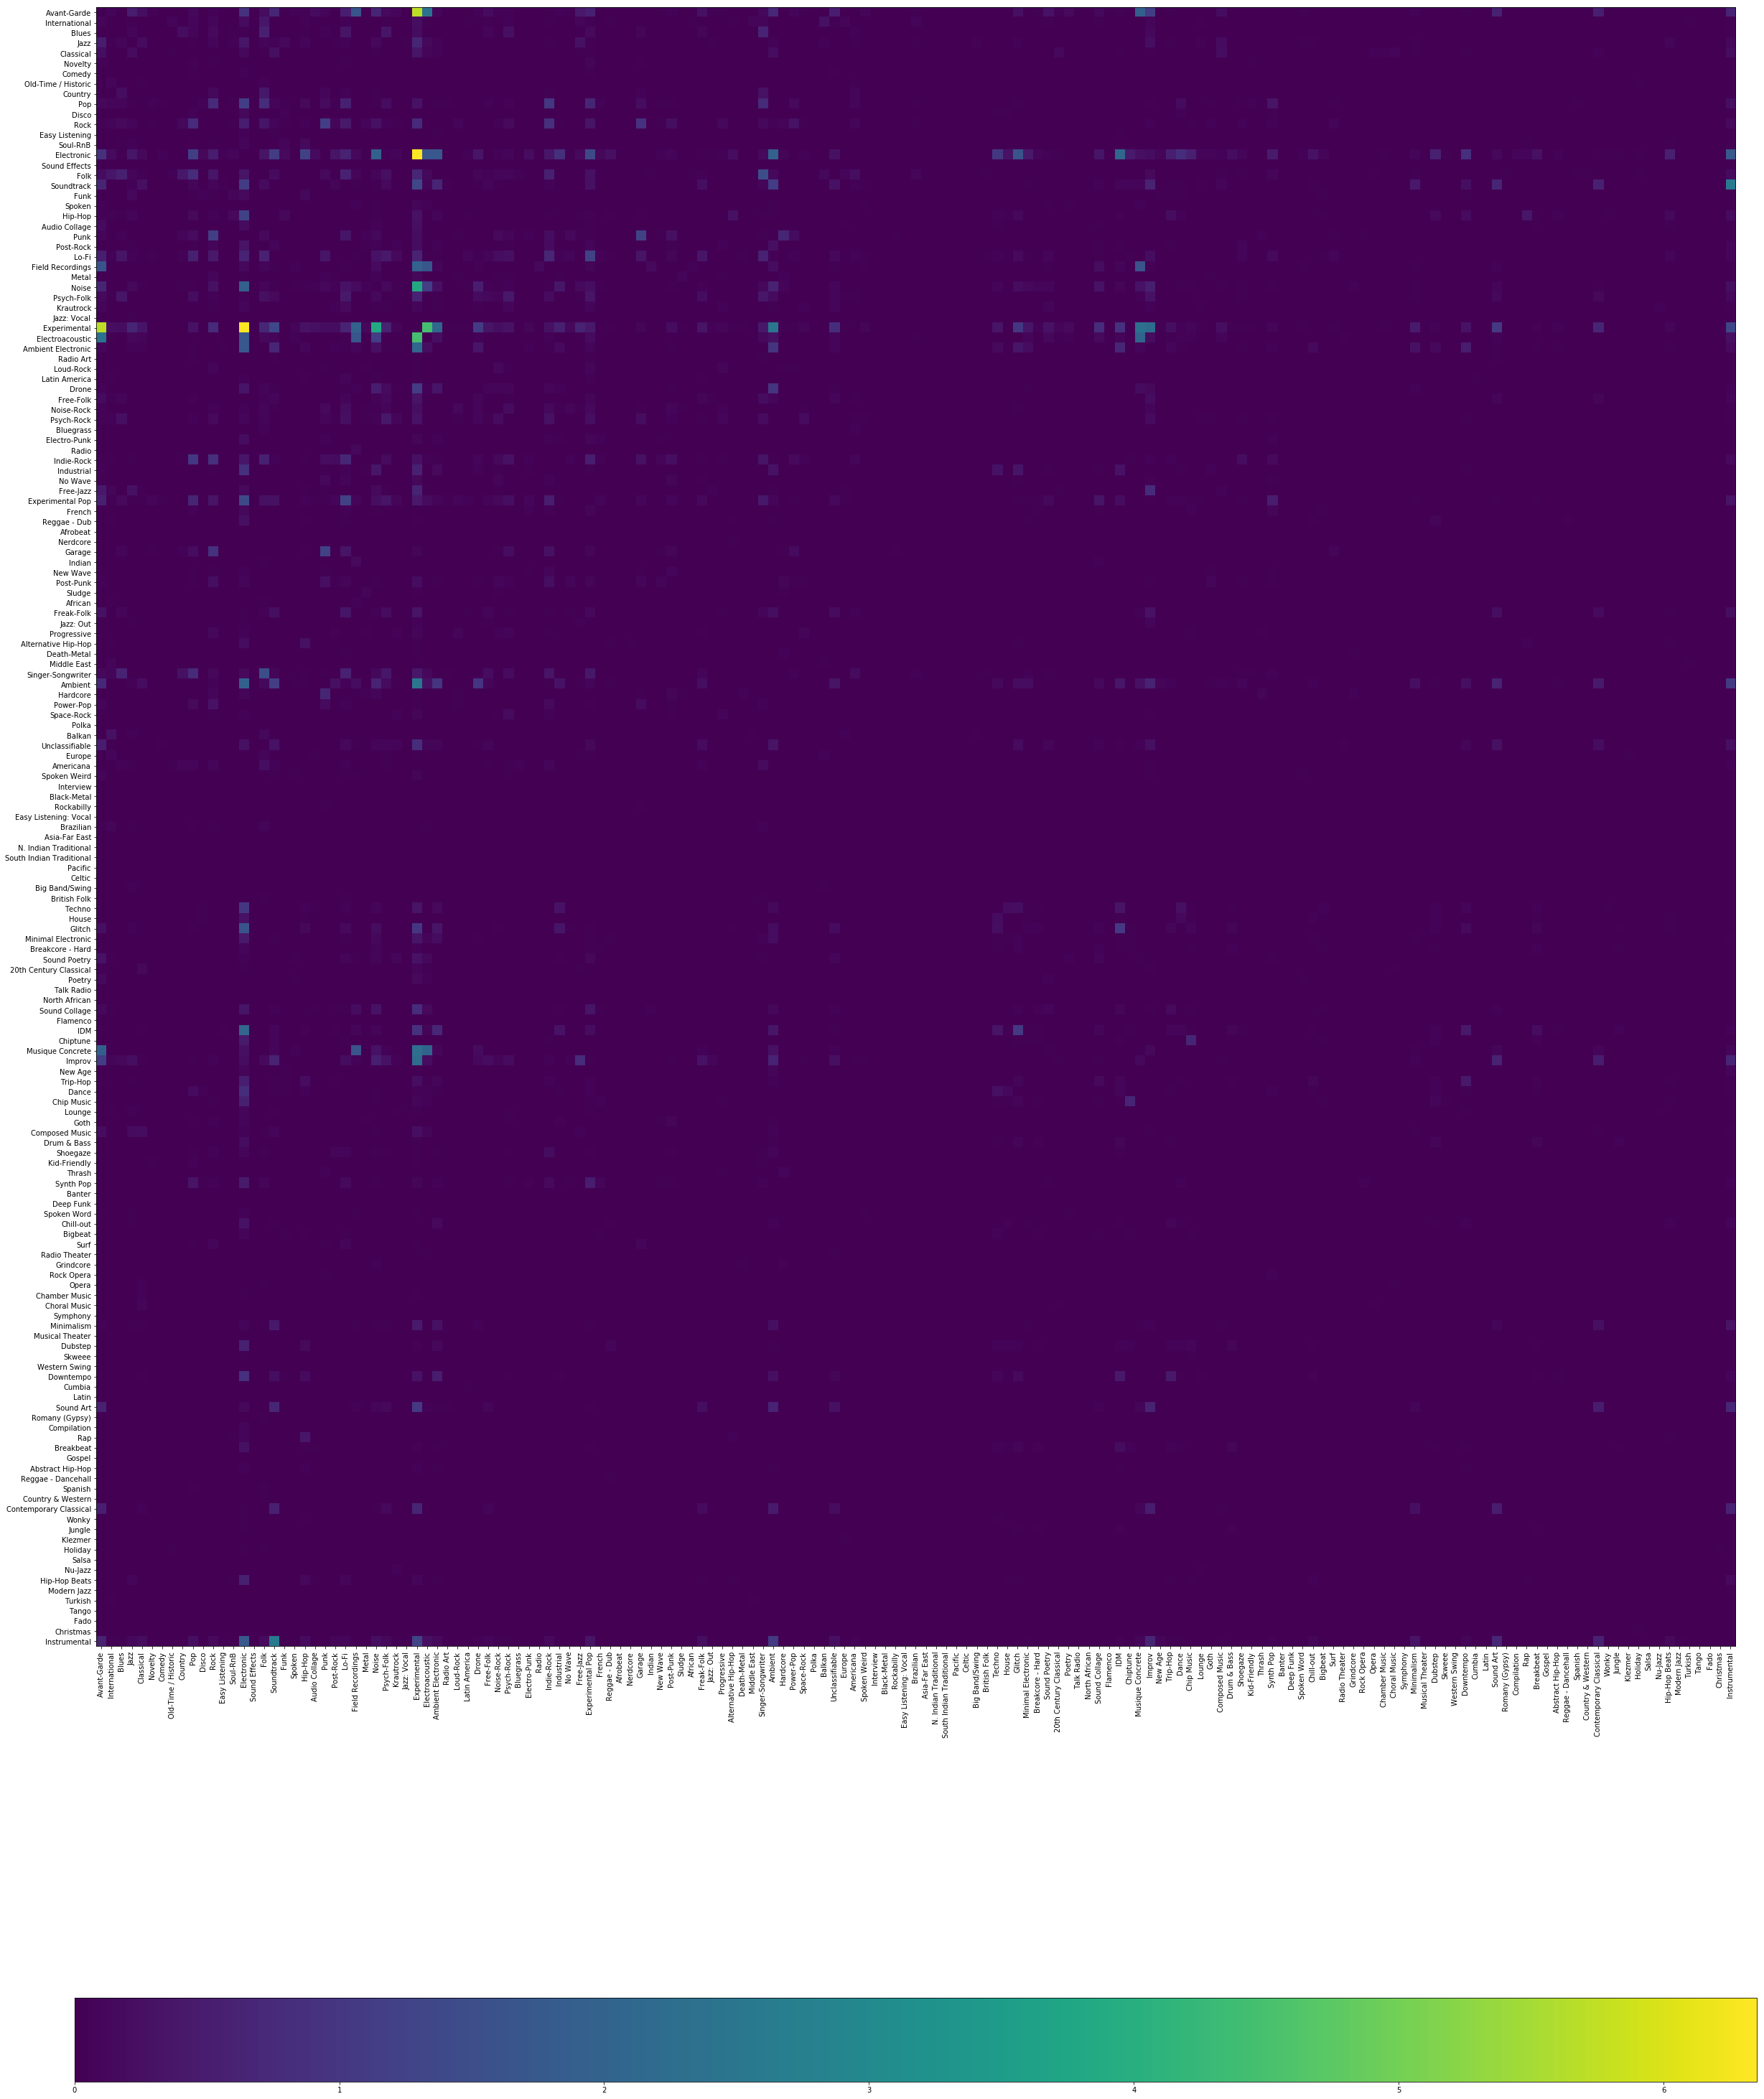

In [23]:
np.fill_diagonal(cross_correlation, 0)
plt.figure(figsize=(60, 60))
plt.imshow(((cross_correlation)/len(tracks))*100)
plt.yticks(range(len(genres_names)), genres_names);
plt.xticks(range(len(genres_names)), genres_names, rotation=90);
#plt.pcolor(np.log(cross_correlation), vmin=0, vmax=np.max(np.log(cross_correlation))
plt.colorbar(orientation='horizontal',shrink=.7)
plt.savefig('crosscorrelation.png')

In [28]:
cross_correlation.mean() #average number of tracks overlapping between genres

20.670267350796653

In [29]:
cross_correlation = np.tril(cross_correlation, k=-1)
sort = np.argsort(cross_correlation.flatten())

N = 20
indices = np.unravel_index(sort[:-N:-1], cross_correlation.shape)
for i, j in zip(*indices):
    print('{}: {} | {}'.format(cross_correlation[i, j], genres_names[i], genres_names[j]))

6771: Experimental | Electronic
6088: Experimental | Avant-Garde
4782: Electroacoustic | Experimental
4121: Experimental | Noise
2783: Instrumental | Soundtrack
2663: Ambient | Experimental
2555: Electroacoustic | Avant-Garde
2507: Musique Concrete | Experimental
2385: Improv | Experimental
2250: Ambient Electronic | Experimental
2230: IDM | Electronic
2183: Musique Concrete | Electroacoustic
2122: Experimental | Field Recordings
2099: Ambient | Electronic
2097: Noise | Electronic
2049: Musique Concrete | Avant-Garde
1888: Instrumental | Electronic
1838: Electroacoustic | Electronic
1834: Ambient Electronic | Electronic
